In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#Werte einlesen epsilon, sigma
tsand = np.array((4,0.1,'Trockener Sand'))

wsand = np.array((25,1,'Wassergesättigter Sand'))

tton = np.array((18,100,'Trockener Ton'))

wton = np.array((30,2000,'Wassergesättigter Ton'))

#Konstante
mü = 4*np.pi*10**(-7)
epsilon_0 = 8.854*10**(-12)
#RFrequenzarray
fmin = 4    #Base 10
fmax = 11   #Base 10
ite = 10**3   #Schritte

f = np.logspace(fmin, fmax, ite)

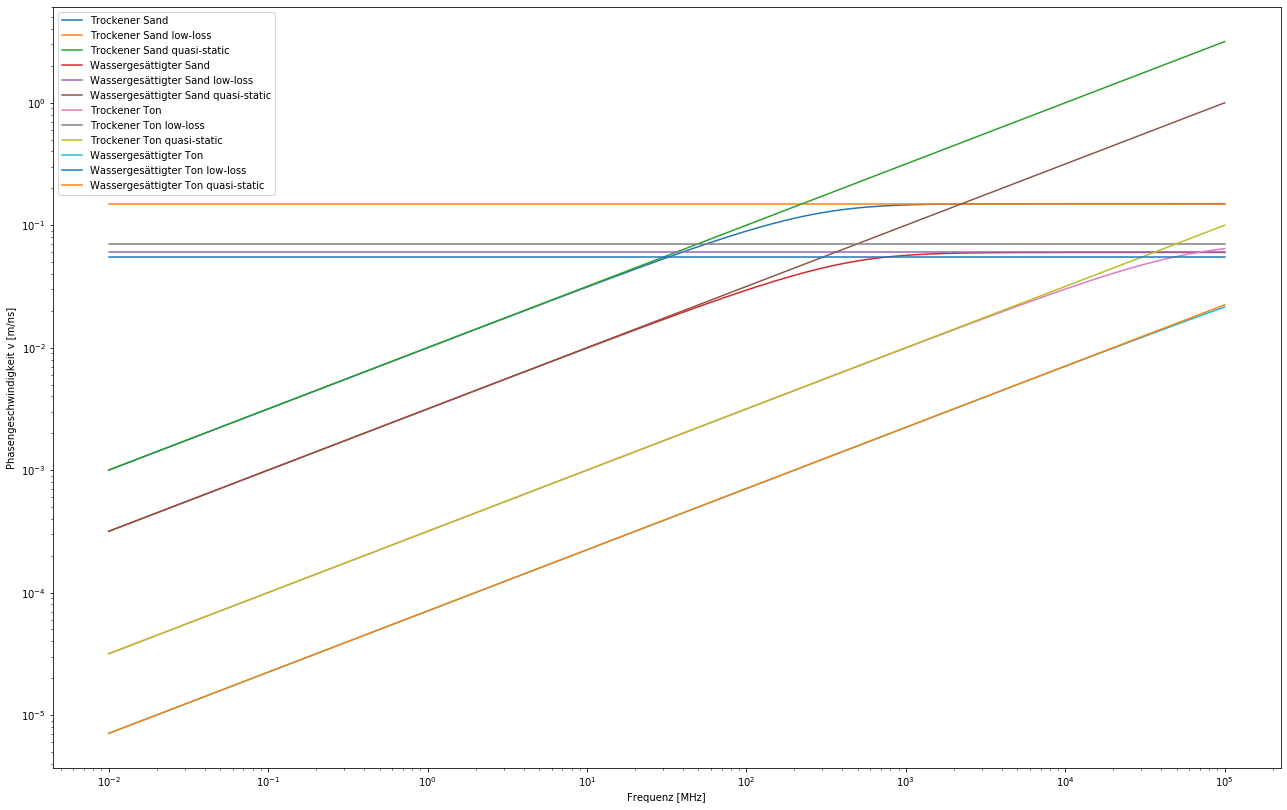

In [11]:
#a) und c) Phasengeschwindigkeit
v = np.zeros(len(f))
alpha = np.zeros(len(f))

omega = 2*np.pi*f

plt.figure(figsize=(22,14))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [MHz]')
plt.ylabel('Phasengeschwindigkeit v [m/ns]')

for i in (tsand,wsand,tton,wton):
    
    #genaue Berechnung
    for j in range(len(f)):
        
        k = (complex(mü*(i[0].astype(float)*epsilon_0)*omega[j]**2,-omega[j]*mü*i[1].astype(float)))**(1/2)     
        v[j] = omega[j]/np.real(k)       
        
    plt.plot(f/10**6,v/10**9,label = i[2])

    #low-loss Approximation
    v = np.full(len(f),1/np.sqrt(i[0].astype(float)*epsilon_0*mü))
    plt.plot(f/10**6,v/10**9,label = i[2] + ' low-loss')
    
    #quasi-static Approximation
    for j in range(len(f)):
        v[j] = np.sqrt(2*omega[j]/(i[1].astype(float)*mü))
    plt.plot(f/10**6,v/10**9,label = i[2] + ' quasi-static')
    
plt.legend()

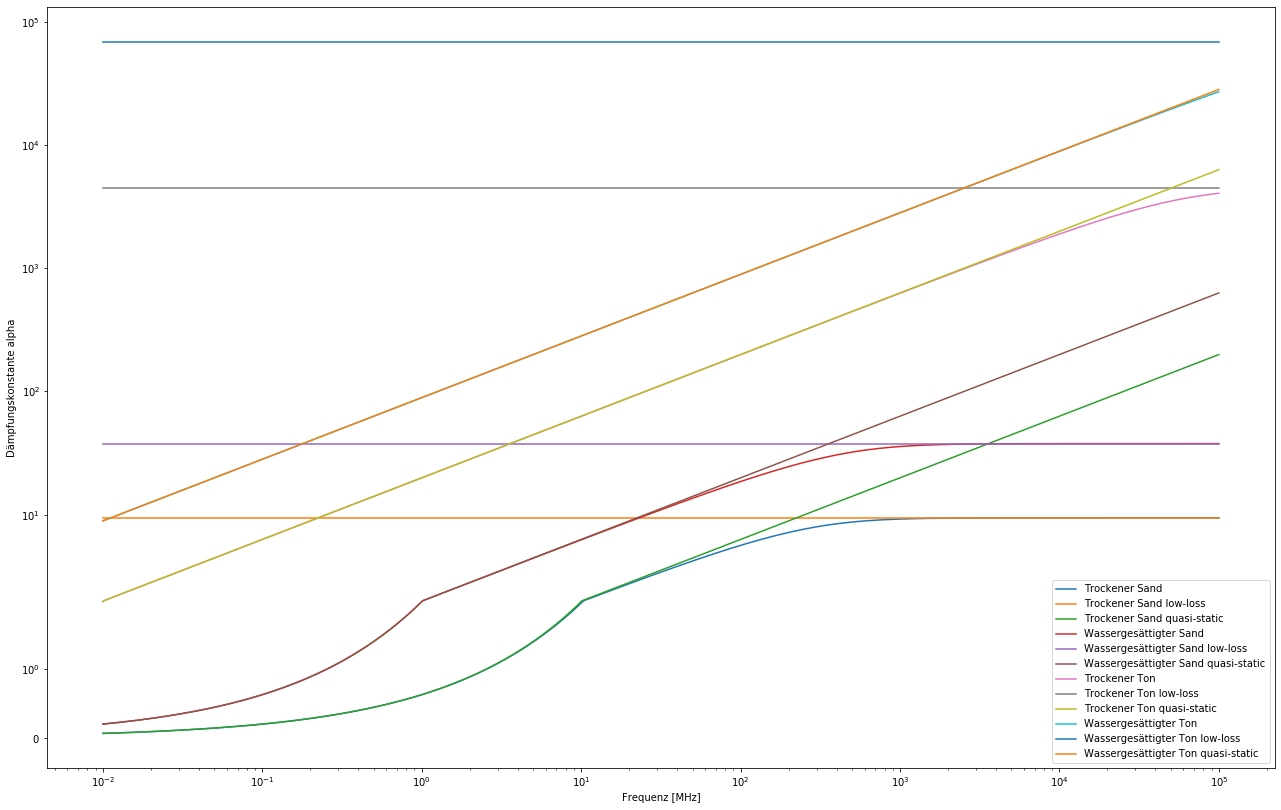

In [12]:
#a) und c) Dämpfungskonstante
v = np.zeros(len(f))
alpha = np.zeros(len(f))

omega = 2*np.pi*f

plt.figure(figsize=(22,14))

plt.xscale('log')
plt.yscale('symlog')
plt.xlabel('Frequenz [MHz]')
plt.ylabel('Dämpfungskonstante alpha')

for i in (tsand,wsand,tton,wton):

    for j in range(len(f)):
        
        k = (complex(mü*(i[0].astype(float)*epsilon_0)*omega[j]**2,-omega[j]*mü*i[1].astype(float)))**(1/2)     
        alpha[j] = -np.imag(k)        
        
    plt.plot(f/10**6, alpha,label = i[2])

    #low-loss Approximation
    alpha = np.full(len(f),i[1].astype(float)/2 * np.sqrt(mü/(i[0].astype(float)*epsilon_0)))
    plt.plot(f/10**6,alpha,label = i[2] + ' low-loss')
    
    #quasi-static Approximation
    for j in range(len(f)):
        alpha[j] = np.sqrt(i[1].astype(float)*mü*omega[j]/2)
    plt.plot(f/10**6,alpha,label = i[2] + ' quasi-static')
    
    
plt.legend()

In [14]:
# c) Grenzfrequenz in MHz
for i in (tsand,wsand,tton,wton):
    fg = (i[1].astype(float)/(4*epsilon_0*i[0].astype(float)*np.pi))/10**6
    
    print('Grenzfrequenz' , i[2] , '=' , fg/1000 ,'MHz')
# Formel: fg = Leitfähigkeit/4*Pi*Permeabilität

Grenzfrequenz Trockener Sand = 0.22469356094970544 MHz
Grenzfrequenz Wassergesättigter Sand = 0.35950969751952866 MHz
Grenzfrequenz Trockener Ton = 49.93190243326787 MHz
Grenzfrequenz Wassergesättigter Ton = 599.1828291992146 MHz


 b)   
Beeinflussung der Phasengeschwindigkeit:  
    je größer die Leitfähigkeit desto größer die Phasengeschwindigkeit bei gleicher Frequenz  
    die Permeabilität begrenzt die maximale Phasengeschwindigkeit

Beeinflussung der Dämpfungskonstante:  
    je größer die Leitfähigkeit desto größer die Dämpfung bei gleicher Frequenz  
    die Permeabilität beeinflusst die maximale Dämpfung